<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-1/blob/main/Implementation_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise Description:**
Design and train two neural networks to tackle the regression and classification
tasks in Question 1 and Question 2. Use the same datasets and train-test
split ratio. Build and train neural networks using PyTorch. Report on the
performance of the NN models, and compare them with the models developed
using Linear Regression and Logistic Regression.

In [400]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Classification:**

In [401]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question2/lung_cancer_dataset.csv")

In [402]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [403]:
#Normalization
df_trn, df_tst = train_test_split( df, test_size=0.3)
X_trn = df_trn.drop(columns=['LUNG_CANCER'])
y_trn = df_trn['LUNG_CANCER']

X_tst = df_tst.drop(columns=['LUNG_CANCER'])
y_tst = df_tst['LUNG_CANCER']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)

y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [404]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst, dtype=torch.float32).reshape(-1,1)

In [405]:
# Define the Model
model = nn.Sequential(
    nn.Linear(15, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
)

Epoch  0: loss on final training batch: 0.6787
Epoch  1: loss on final training batch: 0.6612
Epoch  2: loss on final training batch: 0.6381
Epoch  3: loss on final training batch: 0.6122
Epoch  4: loss on final training batch: 0.5861
Epoch  5: loss on final training batch: 0.5620
Epoch  6: loss on final training batch: 0.5411
Epoch  7: loss on final training batch: 0.5225
Epoch  8: loss on final training batch: 0.5065
Epoch  9: loss on final training batch: 0.4930
Epoch  9: loss on test set: 0.3416


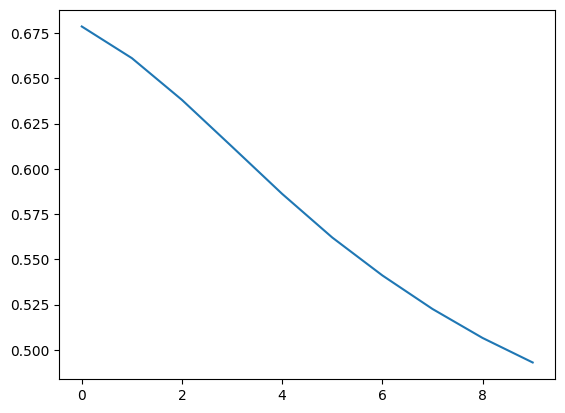

In [406]:
# Train the model
torch.manual_seed(0)
history = []
loss_bce = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
epochs = 10
batch_size = 100
for epoch in range(epochs):
    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_bce(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Epoch %2d: loss on test set: %.4f" % (epoch, loss_bce(model(X_tst_torch), y_tst_torch)))
plt.plot(history)
plt.show()

# **Regression**

In [407]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question1/Health_Insurance_Dataset.csv")

In [408]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [409]:
#Normalization

df_trn, df_tst = train_test_split( df, test_size=0.3)
X_trn = df_trn.drop(columns=['charges'])
y_trn = df_trn['charges']

X_tst = df_tst.drop(columns=['charges'])
y_tst = df_tst['charges']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)
y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [410]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst, dtype=torch.float32).reshape(-1,1)

In [411]:
# Define the Model
model = nn.Sequential(
    nn.Linear(6, 12),
    nn.ReLU(),
    nn.Linear(12, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)

Epoch  0: loss on final training batch: 1.6393
Epoch  1: loss on final training batch: 1.6337
Epoch  2: loss on final training batch: 1.6284
Epoch  3: loss on final training batch: 1.6232
Epoch  4: loss on final training batch: 1.6182
Epoch  5: loss on final training batch: 1.6135
Epoch  6: loss on final training batch: 1.6088
Epoch  7: loss on final training batch: 1.6044
Epoch  8: loss on final training batch: 1.6001
Epoch  9: loss on final training batch: 1.5960
Epoch  9: loss on test set: 1.0824


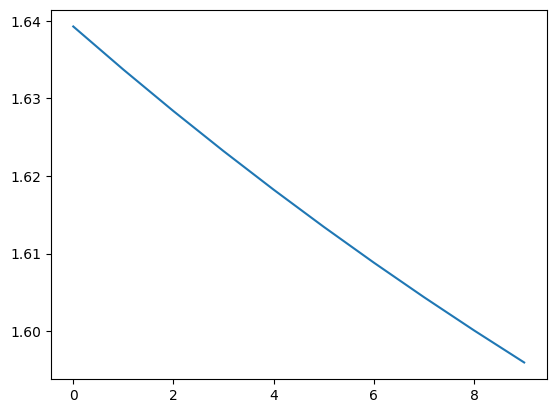

In [412]:
# Train the model
history_regression = []
torch.manual_seed(0)
loss_mse = nn.MSELoss()  # Mean Square Error
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
batch_size = 100

# Training the model
epochs = 10
for epoch in range(epochs):

    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_mse(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history_regression.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Epoch %2d: loss on test set: %.4f" % (epoch, loss_mse(model(X_tst_torch), y_tst_torch)))
plt.plot(history_regression)
plt.show()